# Extract data from a ROOT file

This script reads jet data from a ROOT file and compresses it into a pickle file, which can then be used for scripts training AEs.

In [1]:
import uproot
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt

In [2]:
path = r'F:\Master\Data\ATLAS'
filename = r'data18_13TeV.root'
file = uproot.open(os.sep.join([path, filename]))

In [3]:
tree = file['CollectionTree']

In [ ]:
# find branches in the ROOT file based on a given prefix

i = 0
for key in tree.keys():
    if 'AntiKt4LCTopoJetsAux' in key:
        i += 1
        print(key)
print(i)

In [5]:
# select specific branches based on information in the given text file

branch_filename = r'AntiKt4LC-only-vectors.txt'
branch_file = open(branch_filename)
branches = []
for line in branch_file.readlines():
    if not 'SizeParameter' in line and not 'EMScale' in line and not 'JetConstitScale' in line and not 'JetPileupScale' in line and not 'JetGhostArea' in line:
        branches.append(line.strip('   vector<float>   *').strip(';\n').replace('_', '.', 1))
branch_file.close()
branch_dict = {}

df = pd.DataFrame()

t = time.perf_counter()

print('Number of branches to be processed:', len(branches))
print()

for branch in branches:
        print('Working on branch:', branch)
        branch_array = tree[branch].array(library='pd')
        branch_dict[branch] = []
        df[branch] = branch_array

print()
print('Total processing time:', time.perf_counter() - t, 'seconds.')

Number of branches to be processed: 39

Working on branch: AntiKt4LCTopoJetsAuxDyn.TrackSumMass
Working on branch: AntiKt4LCTopoJetsAuxDyn.TrackSumPt
Working on branch: AntiKt4LCTopoJetsAuxDyn.ECPSFraction
Working on branch: AntiKt4LCTopoJetsAuxDyn.ActiveArea
Working on branch: AntiKt4LCTopoJetsAuxDyn.ActiveArea4vec_eta
Working on branch: AntiKt4LCTopoJetsAuxDyn.ActiveArea4vec_m
Working on branch: AntiKt4LCTopoJetsAuxDyn.ActiveArea4vec_phi
Working on branch: AntiKt4LCTopoJetsAuxDyn.ActiveArea4vec_pt
Working on branch: AntiKt4LCTopoJetsAuxDyn.AverageLArQF
Working on branch: AntiKt4LCTopoJetsAuxDyn.BchCorrCell
Working on branch: AntiKt4LCTopoJetsAuxDyn.CentroidR
Working on branch: AntiKt4LCTopoJetsAuxDyn.DetectorEta
Working on branch: AntiKt4LCTopoJetsAuxDyn.EMFrac
Working on branch: AntiKt4LCTopoJetsAuxDyn.FracSamplingMax
Working on branch: AntiKt4LCTopoJetsAuxDyn.HECFrac
Working on branch: AntiKt4LCTopoJetsAuxDyn.HECQuality
Working on branch: AntiKt4LCTopoJetsAuxDyn.JetEtaJESScaleMomen

In [7]:
short_branchnames = [branch.replace('AntiKt4LCTopoJetsAuxDyn.', '', 1) for branch in branches]
df.columns = short_branchnames

In [9]:
df.to_pickle('F:\Master\Data\pickles\data18_13TeV_pandas.pkl')

In [10]:
df.columns

Index(['TrackSumMass', 'TrackSumPt', 'ECPSFraction', 'ActiveArea',
       'ActiveArea4vec_eta', 'ActiveArea4vec_m', 'ActiveArea4vec_phi',
       'ActiveArea4vec_pt', 'AverageLArQF', 'BchCorrCell', 'CentroidR',
       'DetectorEta', 'EMFrac', 'FracSamplingMax', 'HECFrac', 'HECQuality',
       'JetEtaJESScaleMomentum_eta', 'JetEtaJESScaleMomentum_m',
       'JetEtaJESScaleMomentum_phi', 'JetEtaJESScaleMomentum_pt', 'LArQuality',
       'LeadingClusterCenterLambda', 'LeadingClusterPt',
       'LeadingClusterSecondLambda', 'LeadingClusterSecondR',
       'N90Constituents', 'NegativeE', 'OotFracClusters10', 'OotFracClusters5',
       'Timing', 'Width', 'WidthPhi', 'Charge', 'DetectorPhi', 'GhostTrackPt',
       'JVFCorr', 'Jvt', 'JvtRpt', 'LArBadHVEnergyFrac'],
      dtype='object')

In [155]:
main_idxs = np.array([idx[0] for idx in df.index])
sub_idxs = np.array([idx[1] for idx in df.index])
max_idx = max(main_idxs)

In [146]:
df[main_idxs == 1255].shape

(0, 39)

In [134]:
sub_idxs[main_idxs == 1255]

array([], dtype=int32)

In [147]:
jets_per_main_idx = []
for i in range(max_idx):
    if not sub_idxs[main_idxs == i].shape[0] == 0:
        jets_per_main_idx.append(max(sub_idxs[main_idxs == i]))

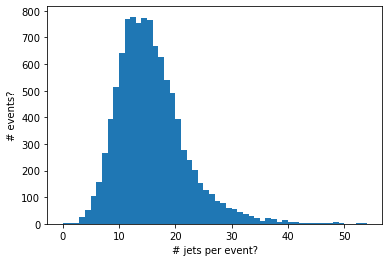

In [153]:
_ = plt.hist(jets_per_main_idx, bins=max(jets_per_main_idx))
plt.ylabel('# events?');
plt.xlabel('# jets per event?');